In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
from config import mod6_params

In [3]:
%matplotlib inline

from gEconpy.classes.model import gEconModel
from gEconpy.plotting import plotting as gp

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs

import numpy as np
import pandas as pd

import os

load model

In [42]:
mod = gEconModel(os.path.join(MODEL_DIR, 'gEconpy_mod6_2.gcn'), verbose=True)

Model Building Complete.
Found:
	24 equations
	24 variables
	The following variables were eliminated at user request:
		U_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	10 parameters
		 1 / 10 have a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [43]:
mod.system_equations

[-Q_t + q_t/lambda_t,
 Ks_t-1*r_t + Ls_t*w_t - P_t*(C_t + I_t) + Pi_t,
 I_t - Ks_t + Ks_t-1*(1 - delta),
 -P_t*lambda_t + C_t**(-sigma_C),
 -Ls_t**sigma_L + lambda_t*w_t,
 -P_t*lambda_t + q_t,
 beta*(lambda_t+1*r_t+1 - q_t+1*(delta - 1)) - q_t,
 A_t*Kd_t**alpha*Ld_t**(1 - alpha) - Y_t,
 -Kd_t*r_t - Ld_t*w_t - TC_t,
 alpha*A_t*Kd_t**(alpha - 1)*Ld_t**(1 - alpha)*mc_t - r_t,
 A_t*Kd_t**alpha*mc_t*(1 - alpha)/Ld_t**alpha - w_t,
 rho_A*log(A_t-1) + epsilon_A_t - log(A_t),
 Theta*beta*g_t+1 - g_t + mc_t,
 psi*g_t/(psi - 1*1) - P_hat_t,
 -P_t + (Theta*P_t-1**(1 - psi) + P_hat_t**(1 - psi)*(1 - Theta))**(1/(1 - psi)),
 P_t/P_t-1 - pi_t,
 psi_w*f_t/(psi_w - 1*1) - w_hat_t,
 Theta*beta*f_t+1 + C_t**sigma_C*L_d_t**sigma_L*P_t - f_t,
 -w_t + (Theta_w*w_t-1**(1 - psi_w) + w_hat_t**(1 - psi_w)*(1 - Theta_w))**(1/(1 - psi_w)),
 -pi_w_t + w_t/w_t-1,
 C_t + I_t - Y_t,
 -Kd_t + Ks_t,
 -Ld_t + Ls_t,
 -Pi_t - TC_t + Y_t]

In [44]:
# assign parameters
mod.free_param_dict.update(mod6_params)
mod.free_param_dict

{'Theta': 0.75,
 'Theta_w': 0.75,
 'alpha': 0.35,
 'beta': 0.985,
 'delta': 0.025,
 'psi': 8,
 'psi_w': 21,
 'rho_A': 0.95,
 'sigma_C': 1,
 'sigma_L': 1}

Investigate priors

Solve

In [37]:
%time mod.steady_state()

Steady state found! Sum of squared residuals is 1.077684365903338e-21
CPU times: total: 2.55 s
Wall time: 2.61 s


In [38]:
# steady state values
mod.print_steady_state()

A_ss               1.000
C_ss               0.544
I_ss               0.028
Kd_ss              1.139
Ks_ss              1.139
L_d_ss             0.098
Ld_ss              0.395
Ls_ss              0.395
P_hat_ss           1.842
P_ss               1.842
Pi_ss              0.814
Q_ss               1.842
TC_ss             -0.241
Y_ss               0.573
f_ss               0.378
g_ss               1.612
lambda_ss          0.998
mc_ss              0.421
pi_ss              1.000
pi_w_ss            1.000
q_ss               1.838
r_ss               0.074
w_hat_ss           0.396
w_ss               0.396


In [12]:
mod.solve_model(solver="gensys")

[0, 1, 0]
Norm of deterministic part: 0.977491574
Norm of stochastic part:    0.977491574


In [13]:
mod.check_bk_condition()
;

Model solution has 6 eigenvalues greater than one in modulus and 5 forward-looking variables.
Blanchard-Kahn condition is satisfied.


''

In [14]:
# policy matrix
for name, policy_matrix in zip(["T", "R"], [round(mod.T, 5), round(mod.R, 5)]):
    print(name.center(10).center(50, "="))
    print(policy_matrix.to_string())

====================    T     ====================
              A    C    I   Kd       Ks  L_d   Ld   Ls         P  P_hat   Pi    Q   TC    Y    f    g  lambda   mc   pi    q    r         w  w_hat
A       0.94927  0.0 -0.0 -0.0  0.00025  0.0 -0.0 -0.0  -0.02703   -0.0  0.0  0.0  0.0  0.0  0.0 -0.0     0.0 -0.0  0.0  0.0 -0.0  -0.00000    0.0
C       0.77989  0.0 -0.0 -0.0  0.39616  0.0 -0.0 -0.0  -0.67053   -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0     0.0 -0.0  0.0  0.0  0.0  -0.00000    0.0
I       5.56511  0.0 -0.0  0.0 -0.86954  0.0 -0.0 -0.0 -62.73608   -0.0  0.0  0.0  0.0  0.0  0.0 -0.0     0.0 -0.0  0.0  0.0 -0.0  -0.00000    0.0
Kd      0.13866 -0.0 -0.0 -0.0  0.95342  0.0 -0.0 -0.0  -1.58588   -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0     0.0 -0.0  0.0  0.0  0.0  -0.00000    0.0
Ks      0.13900 -0.0 -0.0 -0.0  0.95331  0.0 -0.0 -0.0  -1.57320   -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0     0.0 -0.0  0.0  0.0  0.0  -0.00000    0.0
L_d     8.30362  0.0 -0.0 -0.0  5.07136  0.0 -0.0 -0.0 -89.79043   

Model stats

In [17]:
_plot_vars = ['A', 'C', 'I', 'Kd', 'Ld', 'P', 'P_hat', 'Pi', 'Y', 'pi', 'r', 'w']

''

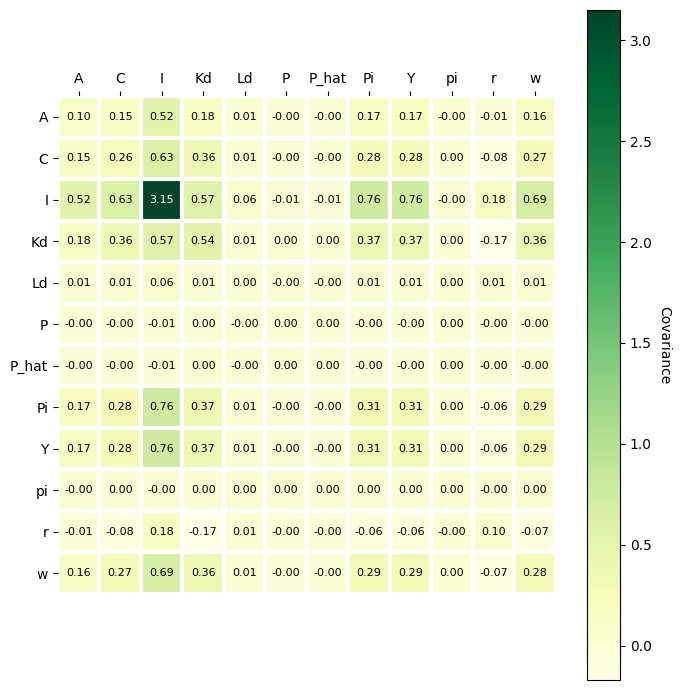

In [18]:
scov = mod.compute_stationary_covariance_matrix()
gp.plot_covariance_matrix(scov,
                          _plot_vars,
                         figsize=(7,7))
;

''

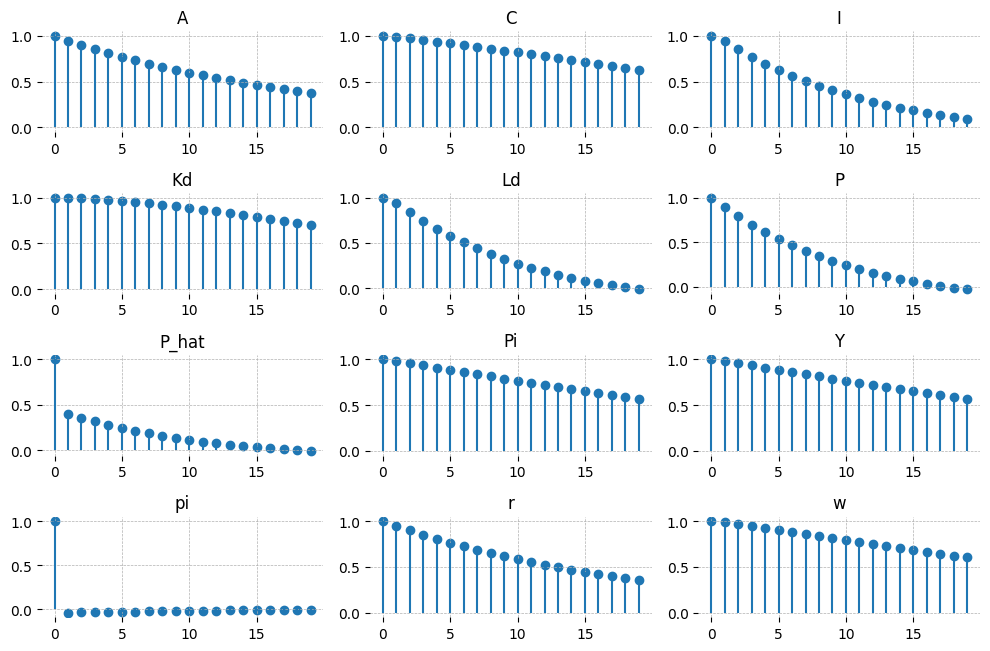

In [19]:
acorr = mod.compute_autocorrelation_matrix(n_lags=20)
gp.plot_acf(acorr, _plot_vars, n_cols=3, figsize=(10, 8))
;

IRF

In [20]:
irf = mod.impulse_response_function(simulation_length=20, shock_size=1.0)
_irf = irf.copy().unstack().loc[:, "epsilon_A"].unstack()

_irf['r/p'] = _irf.r / _irf.pi
_irf['w/p'] = _irf.r / _irf.pi

In [22]:
plot_dfs(_irf[['Y', 'C', 'pi', 'pi_w', 'r', 'r/p', 'w', 'w/p']], sns.lineplot, figsize=(10, 3))

KeyError: "['pi_w'] not in index"